# 第1章 统计学习方法概论

模型选择的方法

1、正则化的作用是选择经验风险与模型复杂度同时较小的模型

2、交叉验证
* 简单交叉验证
* S折交叉验证
* 留一交叉验证

生成模型和判别模型的区别：

生成模型:x,y共同出现的概率，如贝叶斯，HMM；判别模型：y在x出现的情况的出现的概率，如svm、Lr等

分类问题
    accuracy：准确率，precision：精确，recall召回率
    对于分类模型，常用的是precision和recall
    
 回归学习最常用的损失函数是平方损失函数，回归问题可以由最小二乘法（least squares）求解

### 使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正太分布的噪音干扰，用多项式去拟合

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p,x,y):
    ret = fit_func(p,x) - y
    return ret

*ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [3]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

In [4]:
def fitting(M=0):
    """
    M    为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.01092631]


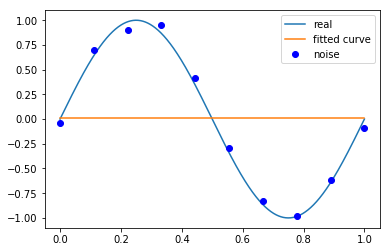

In [5]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.36969991  0.69577627]


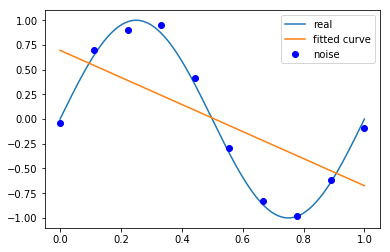

In [6]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 20.65044832 -31.41752496  10.82506204  -0.08352601]


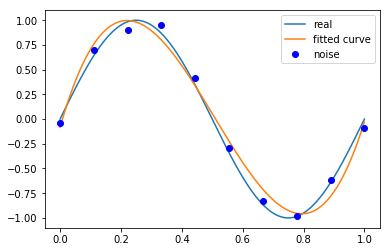

In [7]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [ 4.23767814e+03 -2.10421670e+04  4.43206512e+04 -5.14872624e+04
  3.58047217e+04 -1.50598256e+04  3.67711399e+03 -4.81740231e+02
  3.07807602e+01 -4.30647639e-02]


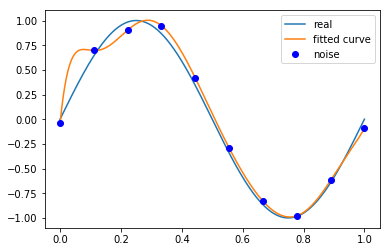

In [8]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [9]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    print("ret:",ret)
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    print("ret_1:",ret)
    return ret

In [12]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
print(p_init)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

[0.09116637 0.4184939  0.12382107 0.01552775 0.54363611 0.44862921
 0.98917496 0.3061882  0.09477516 0.49160849]
ret: [ 0.53467325 -0.18921483 -0.36363315 -0.34527763  0.29184742  1.17809985
  2.00128044  2.60393649  2.97072267  3.61551098]
ret_1: [ 5.34673253e-01 -1.89214829e-01 -3.63633145e-01 -3.45277626e-01
  2.91847420e-01  1.17809985e+00  2.00128044e+00  2.60393649e+00
  2.97072267e+00  3.61551098e+00  6.44643553e-04  2.95919877e-03
  8.75547168e-04  1.09797797e-04  3.84408777e-03  3.17228754e-03
  6.99452321e-03  2.16507750e-03  6.70161556e-04  3.47619696e-03]
ret: [ 0.53467325 -0.18921483 -0.36363315 -0.34527763  0.29184742  1.17809985
  2.00128044  2.60393649  2.97072267  3.61551098]
ret_1: [ 5.34673253e-01 -1.89214829e-01 -3.63633145e-01 -3.45277626e-01
  2.91847420e-01  1.17809985e+00  2.00128044e+00  2.60393649e+00
  2.97072267e+00  3.61551098e+00  6.44643553e-04  2.95919877e-03
  8.75547168e-04  1.09797797e-04  3.84408777e-03  3.17228754e-03
  6.99452321e-03  2.16507750e-0

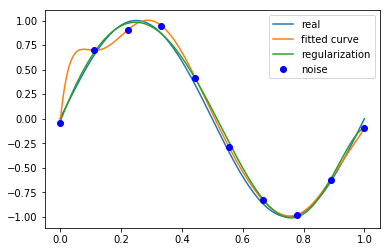

In [13]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()